# Problem 1 : Adventure Works

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime, date

%matplotlib inline

In [2]:
AW_data = pd.read_csv('AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']
AW_test = pd.read_csv('AW_test.csv')
AW_data.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,...,Professional,M,S,1,1,0,0,103199,78,1
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,Professional,F,S,1,1,0,0,84756,54,1
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,...,Professional,M,M,1,2,3,3,109759,130,1
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,...,Professional,F,S,1,3,4,4,88005,85,1
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,Professional,M,S,0,1,0,0,106399,74,0


In [3]:
AW_data.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [4]:
AW_data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

In [5]:
AW_data.shape

(16519, 25)

In [6]:
AW_data.isnull().sum()

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

There are 4 columns that have a large number of missng values. It makes sense to drop those 4 columns.

In [7]:
AW_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)
AW_data.head(20)
    

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1
5,11005,Julio,Ruiz,7305 Humphrey Drive,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,...,Professional,M,S,1,1,0,0,103199,78,1
6,11006,Janet,Alvarez,2612 Berry Dr,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,...,Professional,F,S,1,1,0,0,84756,54,1
7,11007,Marco,Mehta,942 Brook Street,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,...,Professional,M,M,1,2,3,3,109759,130,1
8,11008,Rob,Verhoff,624 Peabody Road,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,...,Professional,F,S,1,3,4,4,88005,85,1
9,11009,Shannon,Carlson,3839 Northgate Road,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,...,Professional,M,S,0,1,0,0,106399,74,0


In [8]:
print(AW_data.shape)
print(AW_data.CustomerID.unique().shape)

(16519, 21)
(16404,)


So there are 115 duplicate cases here which need to be removed.

In [9]:
AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AW_data.shape)
print(AW_data.CustomerID.unique().shape)

(16404, 21)
(16404,)


Now all the duplicate entries have been removed and only their last occurance has been kept.

In [10]:
print(AW_data.columns)

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')


In [11]:
AW_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


From here we can see the max, min, average, mean, median and SD of AveMonthSpend for our data.

In [12]:
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(AW_data, cat_cols)


For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

For column NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

For column NumberChildrenAtHome
0    9924
1    2180
2    1455
3    1057
4     943
5     84

In [13]:
print(AW_data['BikeBuyer'].value_counts())

0    10949
1     5455
Name: BikeBuyer, dtype: int64


Fewer customers have bought bikes than have not bought bikes.

       Occupation  YearlyIncome
0        Clerical       49481.0
1      Management      118781.0
2          Manual       21722.0
3    Professional       99058.0
4  Skilled Manual       66471.5


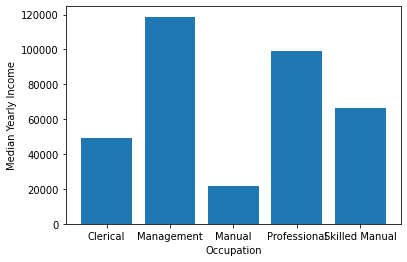

In [14]:
counts = AW_data.groupby(["Occupation"], as_index = False)['YearlyIncome'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['YearlyIncome']])
plt.bar(temp[0], temp[1])
plt.xlabel('Occupation')
plt.ylabel('Median Yearly Income')
plt.show()

From here we can see that the order for median yearly income is as follows:
Management > Professional > Skilled Manual > Clerical > Manual Occupation

In [15]:
dob = []
for born in AW_data['BirthDate']:
    dob.append(datetime.strptime(born, "%Y-%m-%d").date())
surveydate = date(1998,1,1)
age = []
for dt in dob:
    age.append(surveydate.year - dt.year - ((surveydate.month, surveydate.day) < (dt.month, dt.day)))
AW_data['Age'] = age

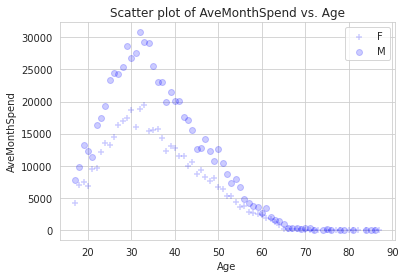

In [16]:
def plot_scatter_shape(data, cols, shape_col = 'Gender', col_y = 'AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = data[data[shape_col] == cat]
            sns.regplot(x=col, y=col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

counts = AW_data[['Gender', 'Age','AveMonthSpend']].groupby(['Gender', 'Age'], as_index = False)['AveMonthSpend'].sum()
plot_scatter_shape(counts, ['Age'])

From here we can see that Males of age between 25 to 40 spend most.

## Data Visualization for Regression

In [17]:
num_cols  = ['YearlyIncome', 'Age']

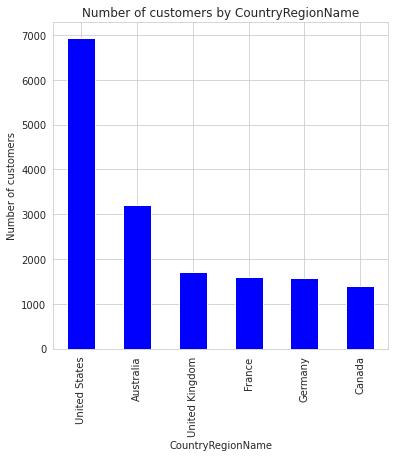

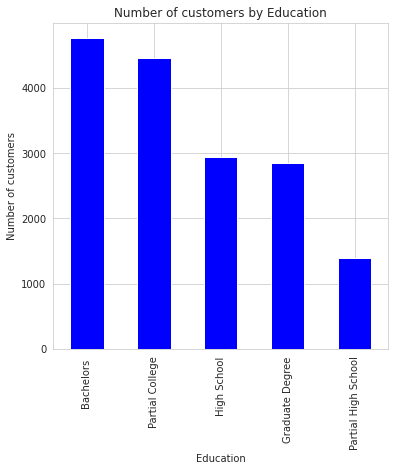

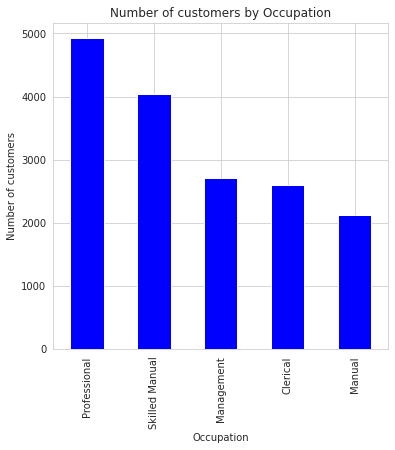

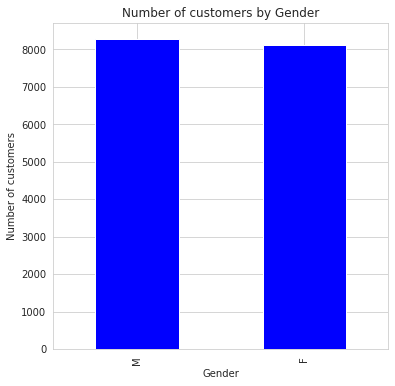

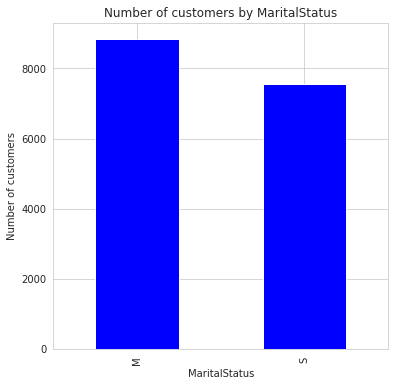

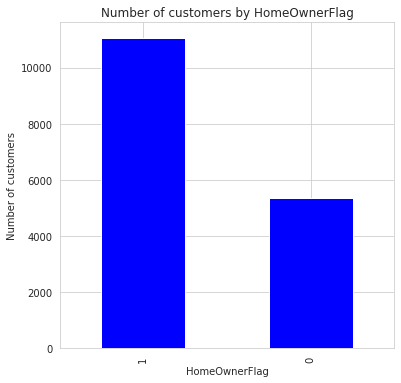

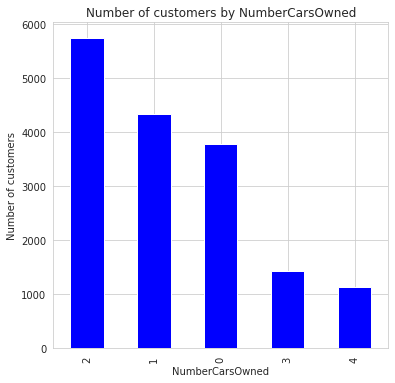

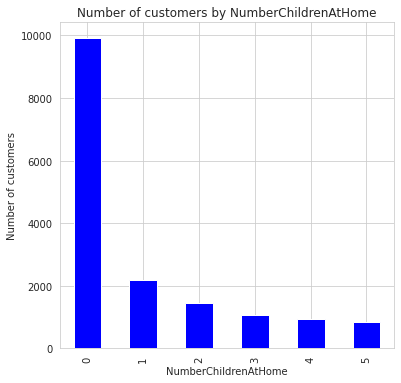

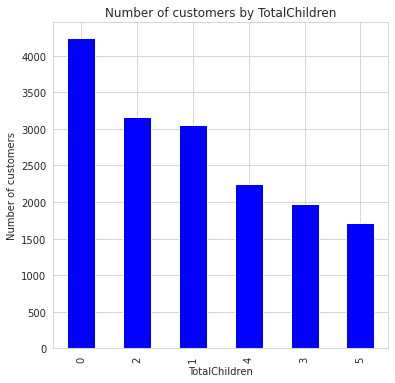

In [18]:
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
plot_bars(AW_data, cat_cols)

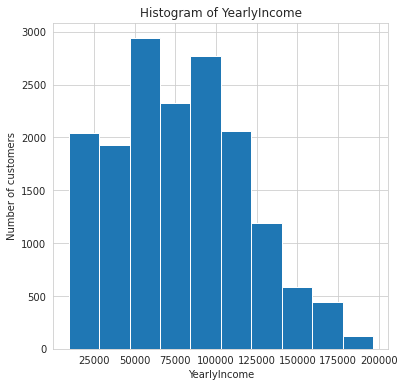

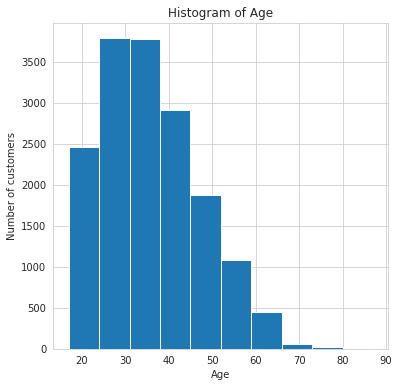

In [19]:
def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
plot_histogram(AW_data, num_cols)

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


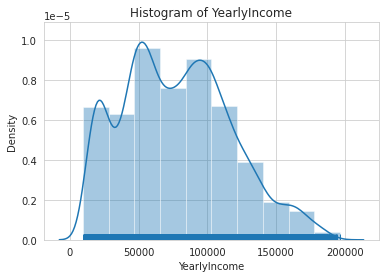

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


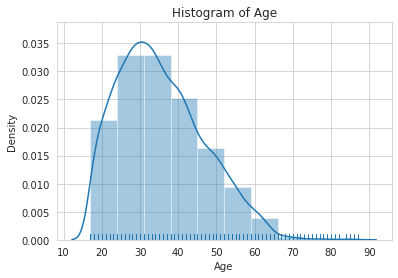

In [20]:
def plot_density_hist(data, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(data[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Density')# Set text for y axis
        plt.show()
plot_density_hist(AW_data, num_cols, hist =True)

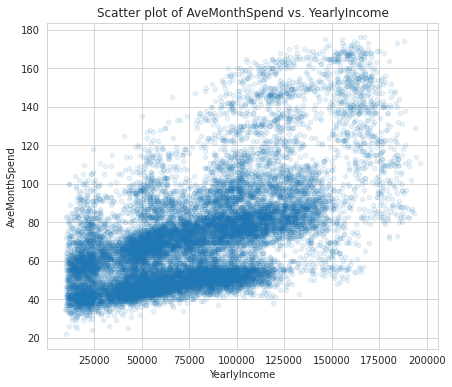

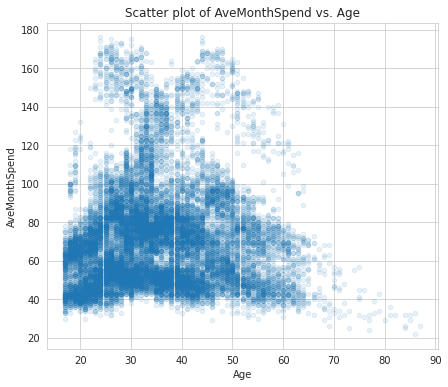

In [21]:
def plot_scatter(data, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        data.plot.scatter(x = col, y = col_y, ax = ax , alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
plot_scatter(AW_data, num_cols , alpha = 0.1)

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


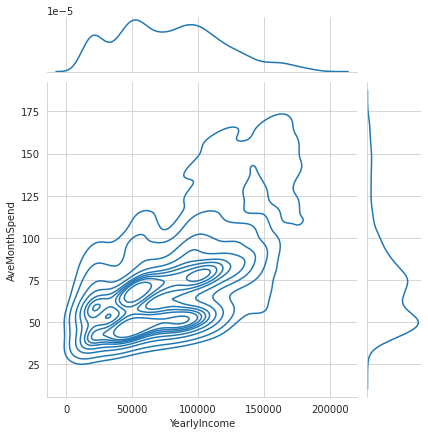

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


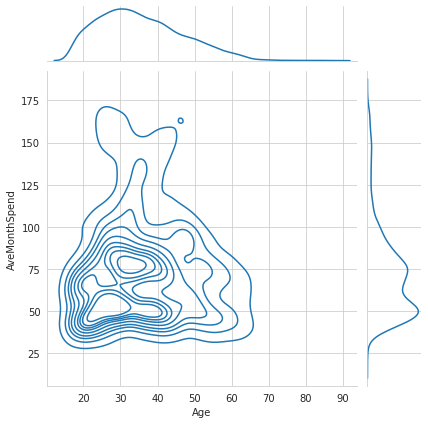

In [22]:
def plot_density_2d(data, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=data, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_density_2d(AW_data,num_cols)

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


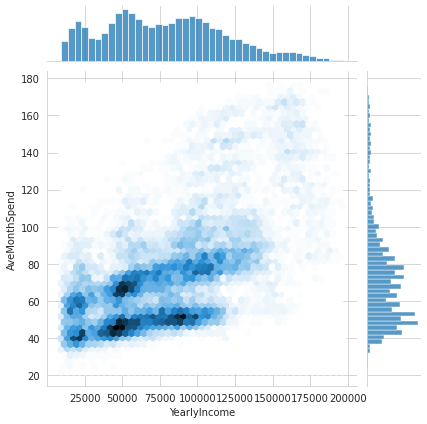

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


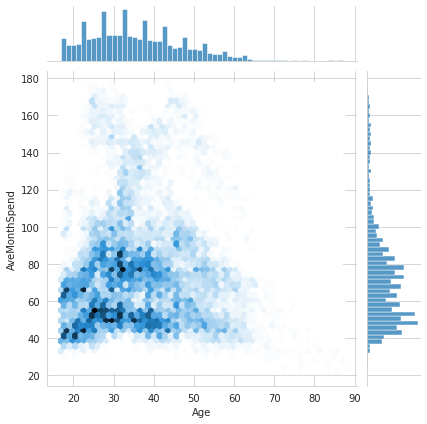

In [23]:
plot_density_2d(AW_data,num_cols, kind ='hex')

From what I observe from these graphs is that both the features only show slight linear correlation with average monthly spend. Although Yearly Income looks a bit more linear than age.

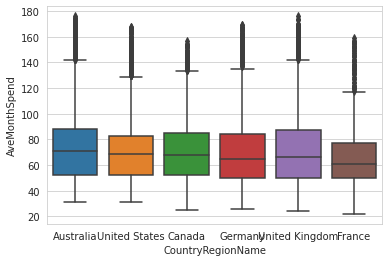

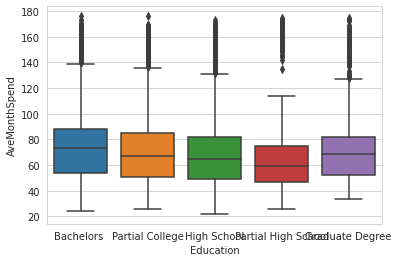

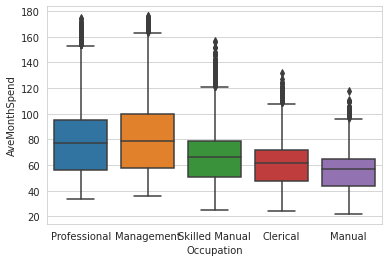

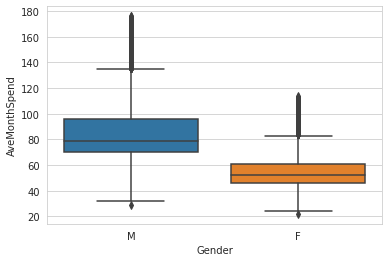

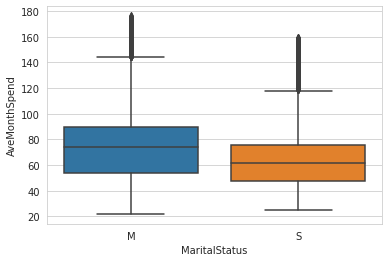

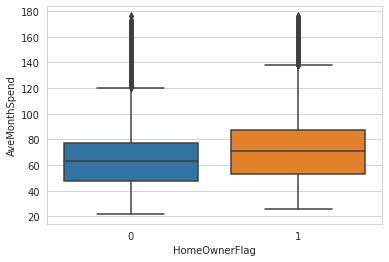

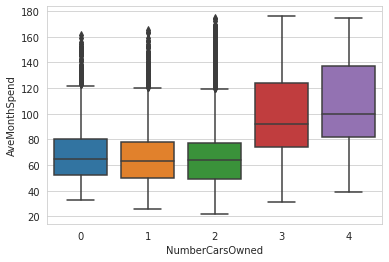

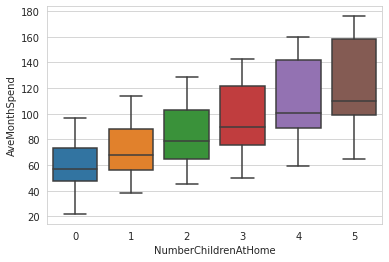

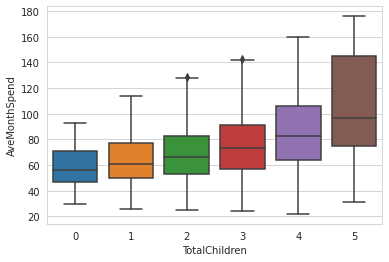

In [24]:
def plot_box(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x = col, y = col_y, data=data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(AW_data, cat_cols)

We can see from here that certain categorical features affect the AveMonthspend more than the rest of the features. We can see that country, homeownerflag, MaritalStatus don't affect the AveMonthSpend much while No. of children at home, totalchildren, Car Owners, affect them a lot.

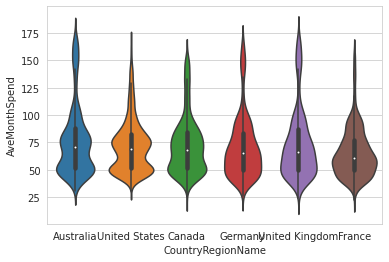

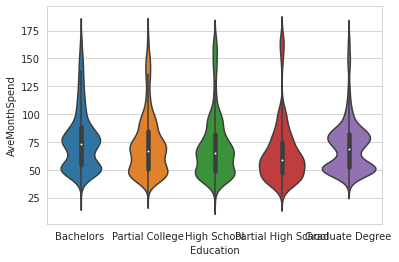

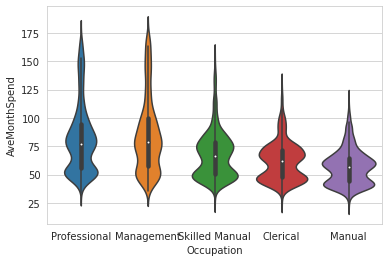

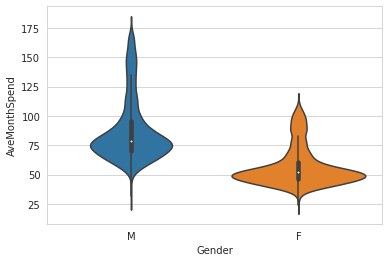

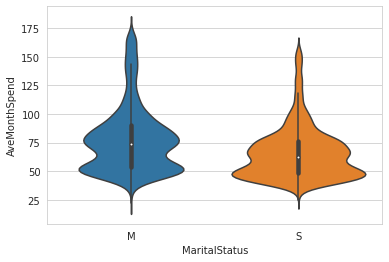

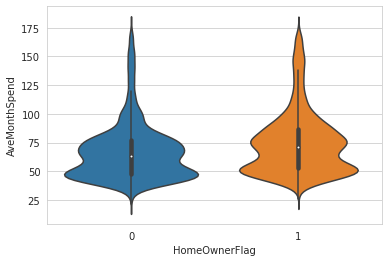

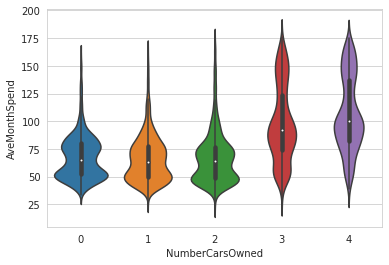

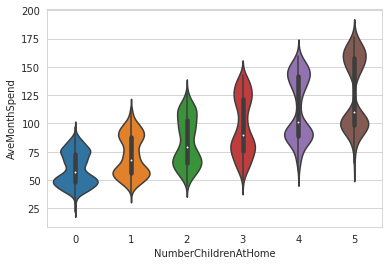

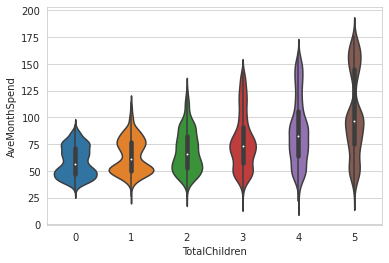

In [25]:
def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(x = col, y = col_y, data=data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
plot_violin(AW_data, cat_cols)

## Visualizing Data for Classification

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


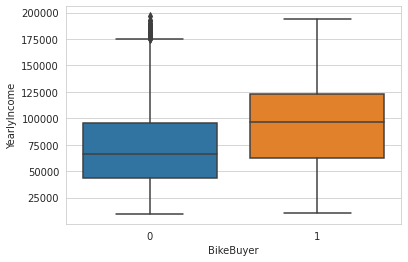

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


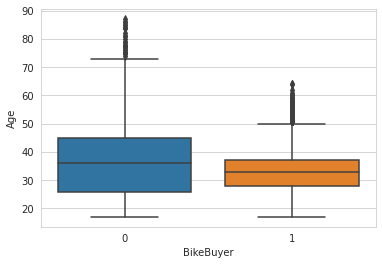

In [26]:
def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_box(AW_data, num_cols)

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


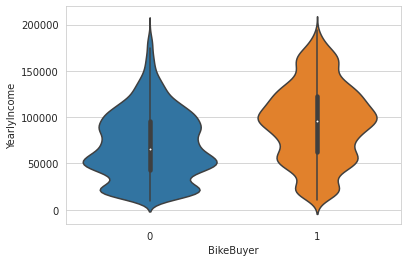

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


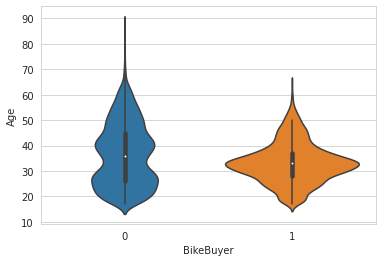

In [27]:
def plot_violin(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(AW_data, num_cols)

CountryRegionName


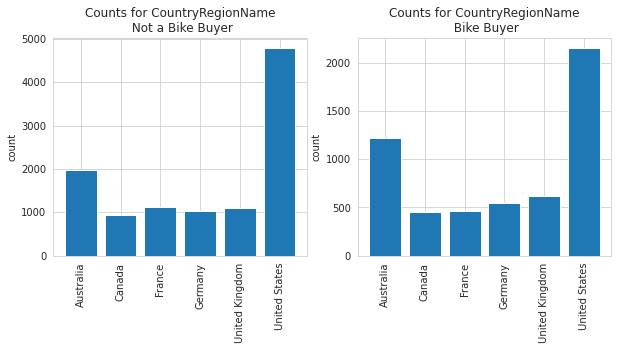

Education


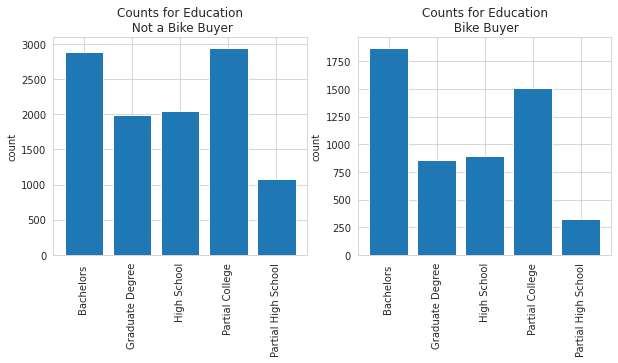

Occupation


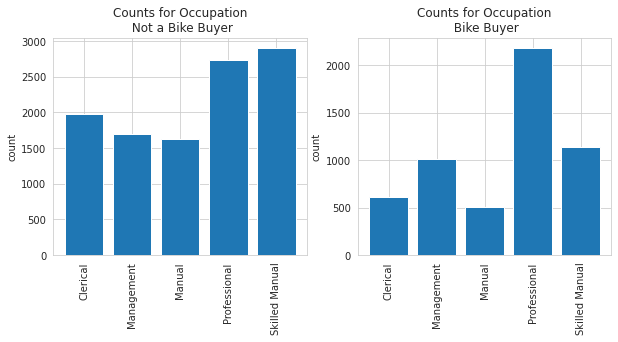

Gender


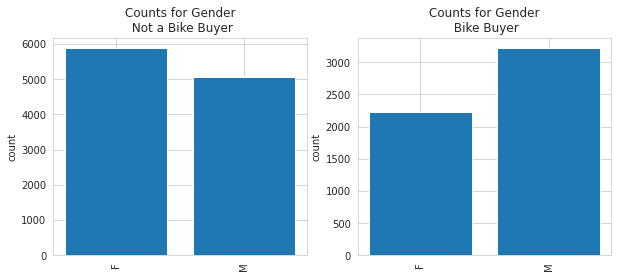

MaritalStatus


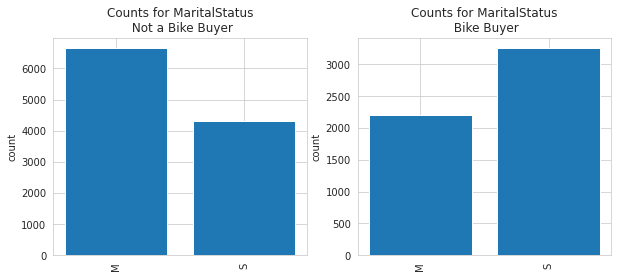

HomeOwnerFlag


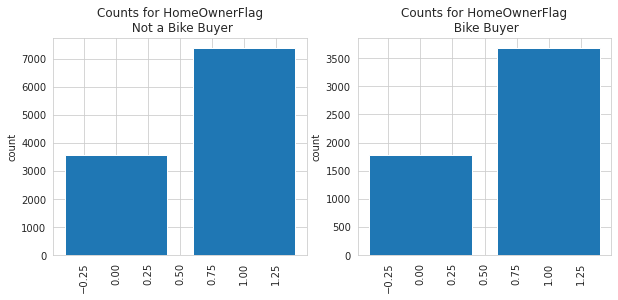

NumberCarsOwned


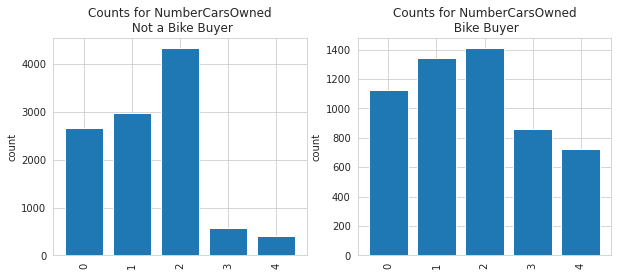

NumberChildrenAtHome


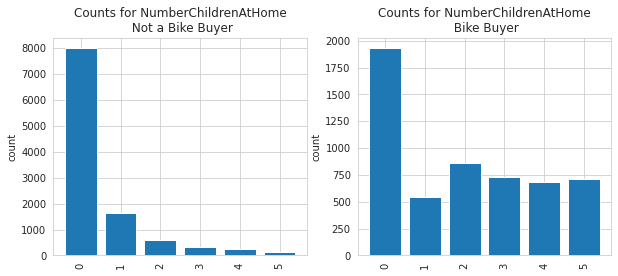

TotalChildren


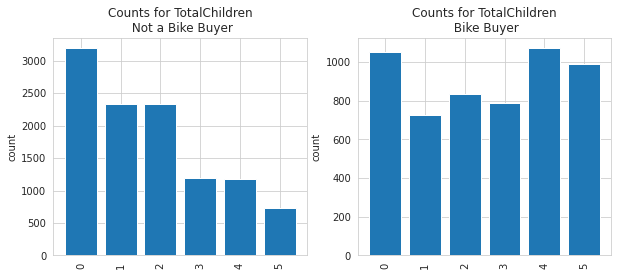

In [28]:
AW_data['dummy'] = np.ones(shape = AW_data.shape[0], dtype = int)
for col in cat_cols:
    print(col)
    counts = AW_data[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).sum()
    plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp['dummy'])
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not a Bike Buyer')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike Buyer')
    plt.ylabel('count')
    plt.show()

# Challenge 2

## Applying Regression for predicting AveMonthSpend

In [29]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss

In [30]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

cat_cols = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome']
Features = encode_string(AW_data['Occupation'])
for col in cat_cols:
    temp = encode_string(AW_data[col])
    Features = np.concatenate([Features, temp], axis = 1)
print(Features.shape)
print(Features[:2])
print(AW_data[['Occupation', 'Education']])

(16404, 25)
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0.]]
           Occupation        Education
0        Professional       Bachelors 
1        Professional       Bachelors 
2        Professional       Bachelors 
3        Professional       Bachelors 
4        Professional       Bachelors 
...               ...              ...
16514    Professional       Bachelors 
16515    Professional  Partial College
16516      Management       Bachelors 
16517  Skilled Manual      High School
16518    Professional      High School

[16404 rows x 2 columns]


In [31]:
Features = np.concatenate([Features, np.array(AW_data[['YearlyIncome']])], axis = 1)

In [32]:
nr.seed(9988)
labels = np.array(AW_data['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 3500)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [33]:
print(x_train[:2])
scaler = preprocessing.StandardScaler().fit(x_train[:,25:])
x_train[:,25:] = scaler.transform(x_train[:,25:])
x_train[:2]
scaler = preprocessing.StandardScaler().fit(x_test[:,25:])
x_test[:,25:] = scaler.transform(x_test[:,25:])

[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 8.5772e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 4.7324e+04]]


In [34]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [35]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 9.99498857e+12  9.99498857e+12  9.99498857e+12  9.99498857e+12
  9.99498857e+12 -8.44432022e+12 -8.44432022e+12 -8.44432022e+12
 -8.44432022e+12 -8.44432022e+12  3.66116109e+12  3.66116109e+12
 -1.17435267e+13 -1.17435267e+13  1.41586980e+12  1.41586980e+12
  1.41586980e+12  1.41586980e+12  1.41586980e+12  5.11582741e+12
  5.11582741e+12  5.11582741e+12  5.11582741e+12  5.11582741e+12
  5.11582741e+12  8.70507812e+00]


In [36]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 26) 

Mean Square Error      = 38.55676514117107
Root Mean Square Error = 6.2094094035722165
Mean Absolute Error    = 4.712687171612024
Median Absolute Error  = 3.63897705078125
R^2                    = 0.9489458692249776
Adjusted R^2           = 0.948578467593033


/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


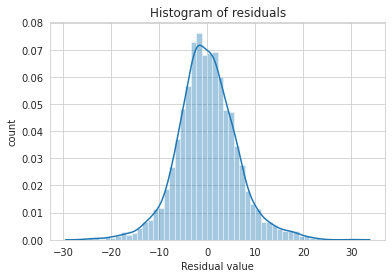

In [37]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)  

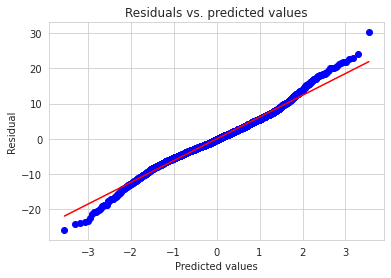

In [38]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

/home/winston/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


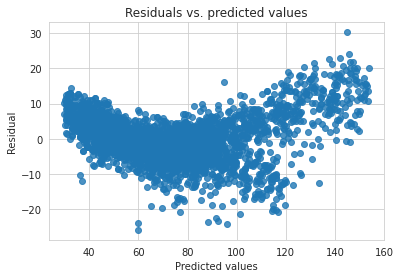

In [39]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [40]:
labels = np.array(AW_data['BikeBuyer'])
y_train = np.ravel(labels[indx[0]])
y_test = np.ravel(labels[indx[1]])
print(x_train)
print(y_train)

[[ 0.          0.          0.         ...  0.          0.
   0.1931553 ]
 [ 1.          0.          0.         ...  0.          0.
  -0.77594867]
 [ 0.          0.          0.         ...  0.          0.
   0.59261326]
 ...
 [ 1.          0.          0.         ...  0.          0.
  -0.09403703]
 [ 0.          1.          0.         ...  1.          0.
   1.13617149]
 [ 0.          0.          0.         ...  0.          0.
  -0.74247566]]
[0 1 1 ... 1 1 0]


In [41]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(x_train, y_train)

LogisticRegression()

In [42]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.19317236]
[[ 0.0920522  -0.81255724  0.36760793  0.06094347  0.29158742  0.30224228
   0.22230084 -0.12858554 -0.05308306 -0.34324073 -0.32070994  0.32034372
  -0.77502691  0.7746607   0.083401    0.17308789 -0.12478976  0.09769495
  -0.2297603  -1.94259071 -1.19373191 -0.00702762  0.64722028  0.81061421
   1.68514953  0.60167013]]


In [43]:
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15,:])

[[0.77924992 0.22075008]
 [0.4894837  0.5105163 ]
 [0.63699404 0.36300596]
 [0.74232679 0.25767321]
 [0.89366523 0.10633477]
 [0.96205737 0.03794263]
 [0.91723171 0.08276829]
 [0.9120724  0.0879276 ]
 [0.89916228 0.10083772]
 [0.74866464 0.25133536]
 [0.97986094 0.02013906]
 [0.3244733  0.6755267 ]
 [0.79624995 0.20375005]
 [0.64165289 0.35834711]
 [0.80968141 0.19031859]]


In [46]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.45)
print(np.array(scores[:15]))
print(y_test[:15])

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0]
